<a href="https://colab.research.google.com/github/Alexandremsn/demand/blob/main/cff_eda_p5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd

Neste projeto vamos usar os arquivos diretamente do drive, para reduzir os tempos de carregamento

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
testdf = pd.read_csv('/content/drive/My Drive/cffiles/test_processed.csv')

importamos os arquivos salvos anteriormente

In [62]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   17280 non-null  int64  
 1   date                 17280 non-null  object 
 2   store_nbr            17280 non-null  int64  
 3   item_nbr             17280 non-null  int64  
 4   onpromotion          17280 non-null  int64  
 5   oil_price            17280 non-null  float64
 6   perishable           17280 non-null  int64  
 7   Friday               17280 non-null  float64
 8   Monday               17280 non-null  float64
 9   Saturday             17280 non-null  float64
 10  Sunday               17280 non-null  float64
 11  Thursday             17280 non-null  float64
 12  Tuesday              17280 non-null  float64
 13  Wednesday            17280 non-null  float64
 14  is_additional        17280 non-null  float64
 15  is_black_friday      17280 non-null 

In [63]:
transactionsdf = pd.read_csv('/content/drive/My Drive/cffiles/transactions_processed.csv')

In [64]:
transactionsdf.tail()

,date,store_nbr,transactions,oil_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,is_additional,is_black_friday,is_cyber_monday,is_holiday,is_holiday_eve,is_natural_disaster,is_world_cup,ordinary,Madre,Navidad,ordinary.1
83483,2017-08-15,50,2804,47.57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
83484,2017-08-15,51,1573,47.57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
83485,2017-08-15,52,2255,47.57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
83486,2017-08-15,53,932,47.57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
83487,2017-08-15,54,802,47.57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [65]:
transactionsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 83488 non-null  object 
 1   store_nbr            83488 non-null  int64  
 2   transactions         83488 non-null  int64  
 3   oil_price            83488 non-null  float64
 4   Friday               83488 non-null  float64
 5   Monday               83488 non-null  float64
 6   Saturday             83488 non-null  float64
 7   Sunday               83488 non-null  float64
 8   Thursday             83488 non-null  float64
 9   Tuesday              83488 non-null  float64
 10  Wednesday            83488 non-null  float64
 11  is_additional        83488 non-null  float64
 12  is_black_friday      83488 non-null  float64
 13  is_cyber_monday      83488 non-null  float64
 14  is_holiday           83488 non-null  float64
 15  is_holiday_eve       83488 non-null 

In [66]:
traindf = pd.read_csv('/content/drive/My Drive/cffiles/train_processed.csv')
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634358 entries, 0 to 1634357
Data columns (total 45 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   id                   1634358 non-null  int64  
 1   date                 1634358 non-null  object 
 2   store_nbr            1634358 non-null  int64  
 3   item_nbr             1634358 non-null  int64  
 4   unit_sales           1634358 non-null  int64  
 5   onpromotion          1634358 non-null  int64  
 6   oil_price            1634358 non-null  float64
 7   perishable           1634358 non-null  int64  
 8   Friday               1634358 non-null  float64
 9   Monday               1634358 non-null  float64
 10  Saturday             1634358 non-null  float64
 11  Sunday               1634358 non-null  float64
 12  Thursday             1634358 non-null  float64
 13  Tuesday              1634358 non-null  float64
 14  Wednesday            1634358 non-null  float64
 15

verificamos colunas que estavam redundantes e dropamos

In [67]:
traindf.drop('ordinary.1', axis = 1,inplace=True )
traindf.drop('ordinary', axis = 1,inplace=True )
testdf.drop('ordinary.1', axis = 1,inplace=True )
testdf.drop('ordinary', axis = 1,inplace=True )
transactionsdf.drop('ordinary.1', axis = 1,inplace=True )
transactionsdf.drop('ordinary', axis = 1,inplace=True )

In [68]:
import seaborn as sns

ajustamos o formato da data

In [69]:
traindf.date = pd.to_datetime(traindf.date, format='%Y-%m-%d')
testdf.date = pd.to_datetime(testdf.date, format='%Y-%m-%d')
transactionsdf.date = pd.to_datetime(transactionsdf.date, format='%Y-%m-%d')

geramos a tabela de correlação

In [70]:
traindf.corr()

,id,store_nbr,item_nbr,unit_sales,onpromotion,oil_price,perishable,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,is_additional,is_black_friday,is_cyber_monday,is_holiday,is_holiday_eve,is_natural_disaster,is_world_cup,Madre,Navidad,BEVERAGES,BREAD/BAKERY,CLEANING,GROCERY I,PERSONAL CARE,1004,1010,1012,1014,1040,1058,1072,1084,1120,1124,2702,3032,3038,4114
id,1.000000,0.019008,-0.001050,-0.033805,0.227110,-0.783264,0.000755,-0.002289,0.002096,0.000403,-2.980891e-03,-0.000693,0.002733,0.000717,0.017720,0.014564,1.490878e-02,0.001666,0.012787,0.085642,-0.064390,0.003346,0.010309,-0.002478,0.000755,-0.000039,0.000830,9.421869e-04,0.000598,-0.003327,-0.002178,0.002104,0.000262,0.002004,0.001483,-1.591650e-03,-0.000581,-0.002827,0.000755,-0.001958,0.001901,9.421869e-04
store_nbr,0.019008,1.000000,0.002817,0.065863,0.002235,-0.015680,-0.000256,0.000186,-0.000129,-0.000200,1.234668e-03,-0.000345,-0.000174,-0.000574,-0.002377,0.000449,4.447051e-04,-0.025737,-0.006332,0.000706,0.001105,0.000067,-0.000198,0.000408,-0.000256,0.003416,-0.002504,2.840309e-04,-0.000321,-0.000878,-0.000085,-0.000534,-0.000209,0.002565,-0.003658,1.768533e-03,-0.001638,0.002194,-0.000256,0.005857,-0.001147,2.840309e-04
item_nbr,-0.001050,0.002817,1.000000,-0.058385,0.022598,0.000725,-0.083312,-0.000235,-0.000370,0.000860,4.423005e-04,-0.000397,-0.000130,-0.000177,-0.000194,-0.000611,-1.972473e-04,-0.000373,-0.000205,0.000332,-0.000110,0.000199,-0.000005,0.404710,-0.083312,0.080323,-0.147039,-2.711112e-01,-0.239484,-0.280779,-0.031336,-0.256151,0.547081,0.200598,-0.280522,2.028155e-01,0.363452,0.194051,-0.083312,0.128282,-0.017556,-2.711112e-01
unit_sales,-0.033805,0.065863,-0.058385,1.000000,0.038454,0.026748,0.059771,-0.030800,0.000389,0.040197,7.240516e-02,-0.041224,-0.019427,-0.022092,0.002351,-0.004765,1.491102e-03,0.011384,0.012464,0.011712,0.002621,0.004959,0.012841,0.076058,0.059771,-0.068137,-0.027524,-1.356273e-02,0.052638,-0.062595,-0.000797,0.054166,-0.069651,-0.059213,0.052061,-7.178434e-02,0.147273,-0.042245,0.059771,-0.049830,-0.044001,-1.356273e-02
onpromotion,0.227110,0.002235,0.022598,0.038454,1.000000,-0.167663,0.023447,-0.001026,-0.006862,-0.002611,1.355907e-02,-0.003346,-0.005015,0.005322,0.002611,0.002465,3.386391e-03,-0.003267,0.009271,0.048570,-0.017920,0.005263,0.003622,0.042439,0.023447,-0.009714,-0.034419,3.723038e-03,-0.016882,-0.037305,-0.047606,-0.063539,-0.018490,0.028957,0.074697,-3.458452e-02,0.036035,0.022420,0.023447,-0.001079,-0.012289,3.723038e-03
oil_price,-0.783264,-0.015680,0.000725,0.026748,-0.167663,1.000000,-0.000414,0.002475,0.002289,-0.000124,1.609015e-03,0.000577,-0.002229,-0.004603,-0.004276,-0.027183,-2.649365e-02,0.004503,-0.022644,-0.119191,0.112044,0.003357,-0.025143,0.001536,-0.000414,0.000486,-0.000508,-1.282730e-03,-0.000402,0.002118,0.001282,-0.001810,0.000333,-0.002688,-0.000185,1.042625e-03,0.000380,0.001732,-0.000414,0.002588,-0.001916,-1.282730e-03
perishable,0.000755,-0.000256,-0.083312,0.059771,0.023447,-0.000414,1.000000,0.000335,-0.000200,-0.000608,-4.320827e-04,0.000484,0.000175,0.000254,-0.000205,0.000134,3.187359e-05,-0.000056,-0.000102,0.000320,0.000018,-0.000070,-0.000136,-0.076950,1.000000,-0.076764,-0.355146,-5.335813e-02,-0.053816,-0.052831,-0.053351,-0.077761,-0.077339,-0.052960,-0.134001,-5.301135e-02,-0.052879,-0.053070,1.000000,-0.052805,-0.052901,-5.335813e-02
Friday,-0.002289,0.000186,-0.000235,-0.030800,-0.001026,0.002475,0.000335,1.000000,-0.166486,-0.167214,-1.662203e-01,-0.165122,-0.166297,-0.165389,-0.018333,0.104322,-1.739755e-02,0.082979,-0.032601,0.001889,0.002655,-0.022304,-0.019658,-0.000257,0.000335,-0.000051,-0.000101,2.969721e-04,0.000236,-0.000967,0.000579,0.000575,-0.000166,-0.000083,-0.000309,6.019397e-05,0.000056,-0.000410,0.000335,-0.000557,0.000485,2.969721e-04
Monday,0.002096,-0.000129,-0.000370,0.000389,-0.006862,0.002289,-0.000200,-0.166486,1.000000,-0.168349,-1.673492e-01,-0.166243,-0.167427,-0.166512,0.022035,-0.017368,1.044983e-01,0.036355,-0.015728,0

In [71]:
transactionsdf.corr()

,store_nbr,transactions,oil_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,is_additional,is_black_friday,is_cyber_monday,is_holiday,is_holiday_eve,is_natural_disaster,is_world_cup,Madre,Navidad
store_nbr,1.000000,0.189311,-0.014729,-0.000112,-0.000064,0.000518,-0.000148,-0.000131,0.000068,-0.000132,-0.002539,0.000454,0.000454,-0.026357,-0.006419,0.000833,0.001037,0.000199,-0.000171
transactions,0.189311,1.000000,0.025684,-0.017189,-0.025063,0.109706,0.064448,-0.061336,-0.039672,-0.030934,0.014651,-0.002877,-0.002139,0.014754,0.122437,-0.004381,0.000971,0.035024,0.113458
oil_price,-0.014729,0.025684,1.000000,0.002235,0.004001,-0.001665,0.001884,0.000348,-0.002028,-0.004770,-0.004388,-0.027422,-0.026491,0.004303,-0.022405,-0.119698,0.112247,0.003264,-0.025173
Friday,-0.000112,-0.017189,0.002235,1.000000,-0.166701,-0.166945,-0.165797,-0.166237,-0.167002,-0.166180,-0.018361,0.105099,-0.017469,0.082884,-0.032739,0.002125,0.002781,-0.022298,-0.019802
Monday,-0.000064,-0.025063,0.004001,-0.166701,1.000000,-0.167436,-0.166284,-0.166726,-0.167493,-0.166668,0.021902,-0.017520,0.104791,0.036917,-0.015526,0.015811,-0.016255,-0.022364,-0.002993
Saturday,0.000518,0.109706,-0.001665,-0.166945,-0.167436,1.000000,-0.166528,-0.166970,-0.167738,-0.166912,0.021833,-0.017546,-0.017546,-0.036602,0.062062,0.001712,0.021342,0.133566,-0.003087
Sunday,-0.000148,0.064448,0.001884,-0.165797,-0.166284,-0.166528,1.000000,-0.165821,-0.166584,-0.165765,-0.018315,-0.017425,-0.017425,0.019320,-0.021653,0.002360,0.021863,-0.022242,-0.004452
Thursday,-0.000131,-0.061336,0.000348,-0.166237,-0.166726,-0.166970,-0.165821,1.000000,-0.167027,-0.166205,0.017461,-0.017471,-0.017471,-0.045551,0.000226,-0.025868,-0.016119,-0.022301,-0.000642
Tuesday,0.000068,-0.039672,-0.002028,-0.167002,-0.167493,-0.167738,-0.166584,-0.167027,1.000000,-0.166969,-0.006293,-0.017552,-0.017552,-0.007406,0.000630,0.001680,0.002487,-0.022404,0.014193
Wednesday,-0.000132,-0.030934,-0.004770,-0.166180,-0.166668,-0.166912,-0.165765,-0.166205,-0.166969,1.000000,-0.018358,-0.017465,-0.017465,-0.049466,0.006798,0.002143,-0.016103,-0.022294,0.016745


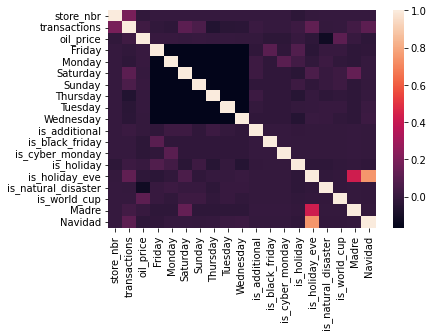

In [72]:
sns.heatmap(data=transactionsdf.corr())

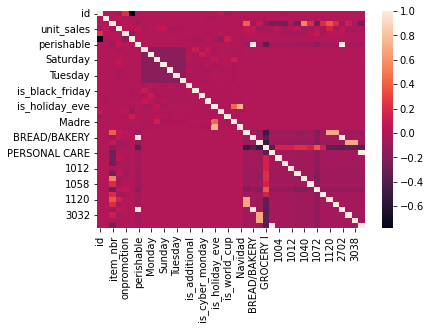

In [73]:
sns.heatmap(data=traindf.corr())

In [74]:
transactionsdf.tail()

,date,store_nbr,transactions,oil_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,is_additional,is_black_friday,is_cyber_monday,is_holiday,is_holiday_eve,is_natural_disaster,is_world_cup,Madre,Navidad
83483,2017-08-15,50,2804,47.57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83484,2017-08-15,51,1573,47.57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83485,2017-08-15,52,2255,47.57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83486,2017-08-15,53,932,47.57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83487,2017-08-15,54,802,47.57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
datatest = traindf.groupby(['date','store_nbr','unit_sales']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset=['store_nbr','unit_sales'])
datatest.head(50)

,date,store_nbr,unit_sales,count
0,2017-06-07,26,2,10
1,2014-09-04,35,3,8
2,2015-05-10,1,2,8
3,2016-09-07,30,3,8
4,2015-11-01,1,1,8
6,2015-07-16,25,2,8
7,2017-06-14,32,2,8
8,2015-02-23,32,1,8
9,2015-04-14,30,5,7
10,2016-12-12,25,3,7


In [76]:
traindf.store_nbr.value_counts()

48    33477
11    33457
46    33451
9     33436
45    33402
47    33399
5     33396
3     33386
49    33360
44    33356
39    33318
50    33307
40    33258
2     33216
6     33215
31    33213
41    33204
17    33176
33    33172
28    33109
4     33067
8     33051
38    33051
51    33021
34    33020
19    32895
15    32842
27    32779
54    32730
43    32726
7     32713
16    32710
13    32696
10    32691
37    32431
23    31991
30    31826
12    31686
14    31669
1     31614
26    31199
24    31027
32    30832
35    30681
36    30563
18    30474
25    30442
53    22462
20    18051
29    17257
21    14914
42    13768
22    12852
52     2319
Name: store_nbr, dtype: int64

In [77]:
traindf.item_nbr.value_counts()

502331     83475
314384     83450
364606     83308
265559     83047
559870     82513
1036689    82134
273528     82108
564533     82086
261052     81774
414353     81755
1084881    81324
839363     81268
850333     81097
414750     81091
847863     80947
581078     80776
1047679    80713
258396     80574
759893     80499
841842     80419
Name: item_nbr, dtype: int64

In [78]:
pd.set_option('display.max_columns', 500)

In [79]:
dataselect = traindf[traindf['BEVERAGES']==1.0]
dataselect = dataselect.groupby('date').sum()

selectcateg = ['perishable', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'is_additional', 'is_black_friday',
       'is_cyber_monday', 'is_holiday', 'is_holiday_eve',
       'is_natural_disaster', 'is_world_cup', 'Madre', 'Navidad', 'BEVERAGES',
       'BREAD/BAKERY', 'CLEANING', 'GROCERY I', 'PERSONAL CARE', '1004',
       '1010', '1012', '1014', '1040', '1058', '1072', '1084', '1120', '1124',
       '2702', '3032', '3038', '4114']
for i in selectcateg:
  dataselect[i] = dataselect[i].apply(lambda x: 1 if x>0 else 0)  
dataselect.head()      

,id,store_nbr,item_nbr,unit_sales,onpromotion,oil_price,perishable,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,is_additional,is_black_friday,is_cyber_monday,is_holiday,is_holiday_eve,is_natural_disaster,is_world_cup,Madre,Navidad,BEVERAGES,BREAD/BAKERY,CLEANING,GROCERY I,PERSONAL CARE,1004,1010,1012,1014,1040,1058,1072,1084,1120,1124,2702,3032,3038,4114
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,912,50,1887042,44,0,135.428732,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2013-01-02,1991261,2420,86803932,4610,0,8568.880000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2013-01-03,5746616,2420,86803932,3596,0,8553.240000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2013-01-04,9332934,2408,85964569,3603,0,8473.920000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2013-01-05,13228117,2420,86803932,4988,0,8567.040000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [80]:
dataselect_bread = traindf[traindf['BREAD/BAKERY']==1.0]
dataselect_bread = dataselect_bread.groupby('date').sum()

selectcateg = ['perishable', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'is_additional', 'is_black_friday',
       'is_cyber_monday', 'is_holiday', 'is_holiday_eve',
       'is_natural_disaster', 'is_world_cup', 'Madre', 'Navidad', 'BEVERAGES',
       'BREAD/BAKERY', 'CLEANING', 'GROCERY I', 'PERSONAL CARE', '1004',
       '1010', '1012', '1014', '1040', '1058', '1072', '1084', '1120', '1124',
       '2702', '3032', '3038', '4114']
for i in selectcateg:
  dataselect_bread[i] = dataselect_bread[i].apply(lambda x: 1 if x>0 else 0)  
dataselect_bread.head()  

,id,store_nbr,item_nbr,unit_sales,onpromotion,oil_price,perishable,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,is_additional,is_black_friday,is_cyber_monday,is_holiday,is_holiday_eve,is_natural_disaster,is_world_cup,Madre,Navidad,BEVERAGES,BREAD/BAKERY,CLEANING,GROCERY I,PERSONAL CARE,1004,1010,1012,1014,1040,1058,1072,1084,1120,1124,2702,3032,3038,4114
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,215,25,502331,30,0,67.714366,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2013-01-02,978796,1210,23107226,3474,0,4284.440000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2013-01-03,2781565,1164,22604895,2288,0,4183.650000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2013-01-04,4697184,1210,23107226,2100,0,4283.520000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2013-01-05,6596917,1210,23107226,2894,0,4283.520000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [81]:
from matplotlib import pyplot as plt

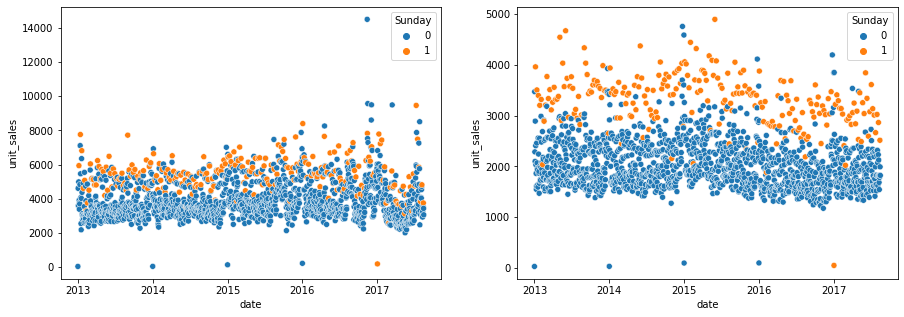

In [82]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(data=dataselect, x='date', y='unit_sales', hue='Sunday', ax=axes[0])
sns.scatterplot(data=dataselect_bread, x='date', y='unit_sales', hue='Sunday', ax=axes[1])


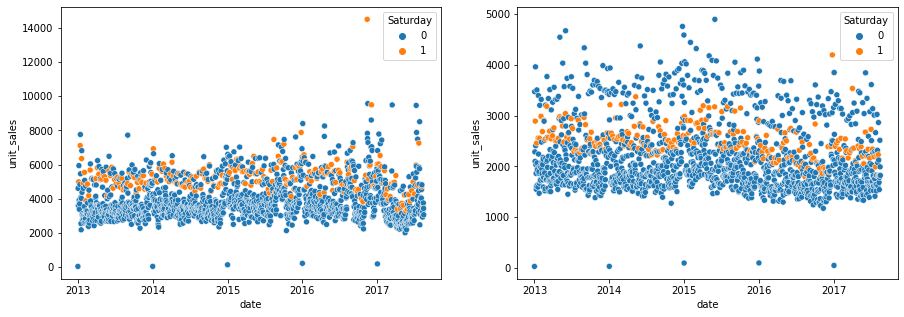

In [83]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(data=dataselect, x='date', y='unit_sales', hue='Saturday', ax=axes[0])
sns.scatterplot(data=dataselect_bread, x='date', y='unit_sales', hue='Saturday', ax=axes[1])


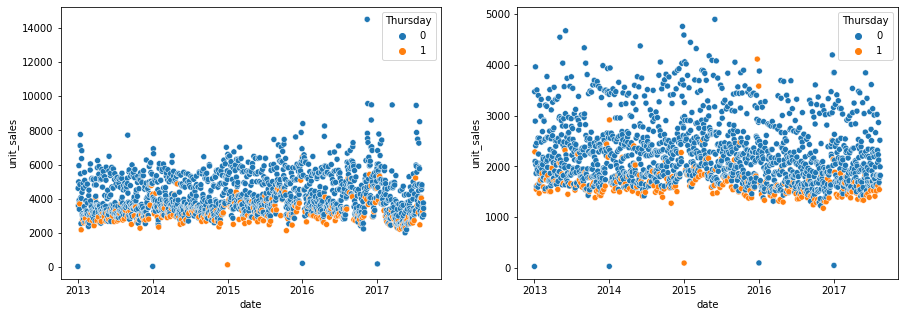

In [84]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(data=dataselect, x='date', y='unit_sales', hue='Thursday', ax=axes[0])
sns.scatterplot(data=dataselect_bread, x='date', y='unit_sales', hue='Thursday', ax=axes[1])


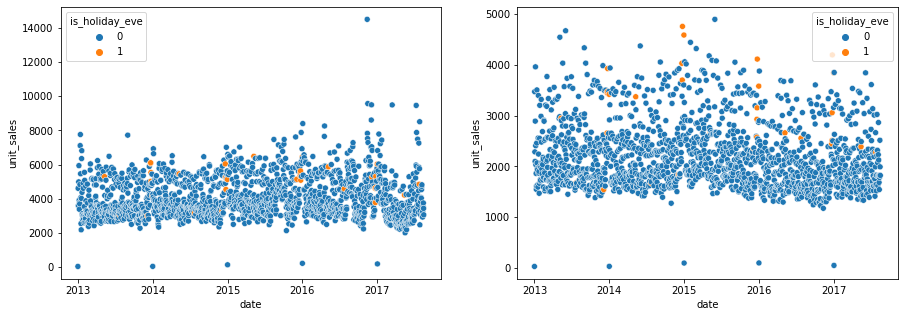

In [85]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(data=dataselect, x='date', y='unit_sales', hue='is_holiday_eve', ax=axes[0])
sns.scatterplot(data=dataselect_bread, x='date', y='unit_sales', hue='is_holiday_eve', ax=axes[1])


In [86]:
dataselect[dataselect['unit_sales']>12000].head()

,id,store_nbr,item_nbr,unit_sales,onpromotion,oil_price,perishable,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,is_additional,is_black_friday,is_cyber_monday,is_holiday,is_holiday_eve,is_natural_disaster,is_world_cup,Madre,Navidad,BEVERAGES,BREAD/BAKERY,CLEANING,GROCERY I,PERSONAL CARE,1004,1010,1012,1014,1040,1058,1072,1084,1120,1124,2702,3032,3038,4114
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-11-12,9862500317,2750,96030826,14488,53,4425.78,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


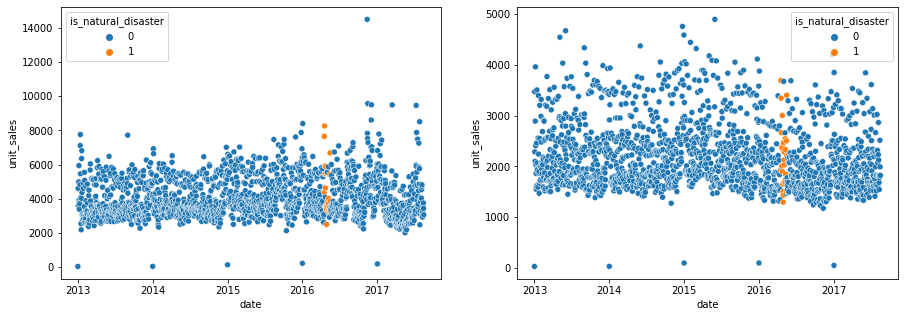

In [87]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(data=dataselect, x='date', y='unit_sales', hue='is_natural_disaster', ax=axes[0])
sns.scatterplot(data=dataselect_bread, x='date', y='unit_sales', hue='is_natural_disaster', ax=axes[1])

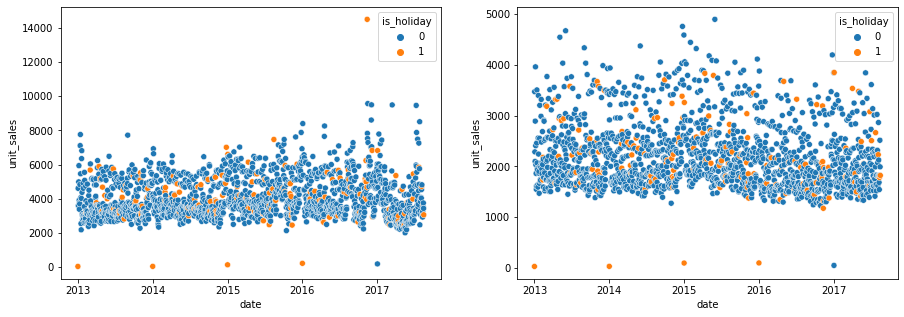

In [88]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(data=dataselect, x='date', y='unit_sales', hue='is_holiday', ax=axes[0])
sns.scatterplot(data=dataselect_bread, x='date', y='unit_sales', hue='is_holiday', ax=axes[1])


In [89]:
dataselect_bread[dataselect_bread['unit_sales']>4500].head(50)

,id,store_nbr,item_nbr,unit_sales,onpromotion,oil_price,perishable,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,is_additional,is_black_friday,is_cyber_monday,is_holiday,is_holiday_eve,is_natural_disaster,is_world_cup,Madre,Navidad,BEVERAGES,BREAD/BAKERY,CLEANING,GROCERY I,PERSONAL CARE,1004,1010,1012,1014,1040,1058,1072,1084,1120,1124,2702,3032,3038,4114
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-05-05,238233060,1210,23107226,4548,0,4381.50,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2013-06-02,301355092,1246,23609557,4675,0,4320.71,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2014-12-24,1829077670,1299,24111888,4761,1,2673.60,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2014-12-31,1850685339,1299,24111888,4591,0,2565.60,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2015-05-31,2392898571,1348,25116550,4900,0,3012.50,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [90]:
transactionsdf.columns


Index(['date', 'store_nbr', 'transactions', 'oil_price', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'is_additional', 'is_black_friday', 'is_cyber_monday', 'is_holiday',
       'is_holiday_eve', 'is_natural_disaster', 'is_world_cup', 'Madre',
       'Navidad'],
      dtype='object')

In [91]:
list_categorical_variables_transactions = ['Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'is_additional', 'is_black_friday', 'is_cyber_monday', 'is_holiday',
       'is_holiday_eve', 'is_natural_disaster', 'is_world_cup', 'Madre',
       'Navidad']
transactionsdf.date = pd.to_datetime(transactionsdf.date)
transactionss = transactionsdf.groupby('date').sum()
for i in list_categorical_variables_transactions:
  transactionss[i] = transactionss[i].apply(lambda x: 1 if x>0 else 0) 
transactionss.reset_index(inplace=True)
transactionss['day_name'] = transactionss['date'].apply(lambda x: x.day_name()) 
transactionss.head() 

,date,store_nbr,transactions,oil_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,is_additional,is_black_friday,is_cyber_monday,is_holiday,is_holiday_eve,is_natural_disaster,is_world_cup,Madre,Navidad,day_name
0,2013-01-01,25,770,67.714366,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,Tuesday
1,2013-01-02,1210,93215,4284.440000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Wednesday
2,2013-01-03,1210,78504,4276.620000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Thursday
3,2013-01-04,1210,78494,4283.520000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Friday
4,2013-01-05,1210,93573,4283.520000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Saturday


In [92]:
transactionsdf.head() 

,date,store_nbr,transactions,oil_price,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,is_additional,is_black_friday,is_cyber_monday,is_holiday,is_holiday_eve,is_natural_disaster,is_world_cup,Madre,Navidad
0,2013-01-01,25,770,67.714366,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2013-01-02,1,2111,93.140000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-01-02,2,2358,93.140000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-01-02,3,3487,93.140000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-01-02,4,1922,93.140000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


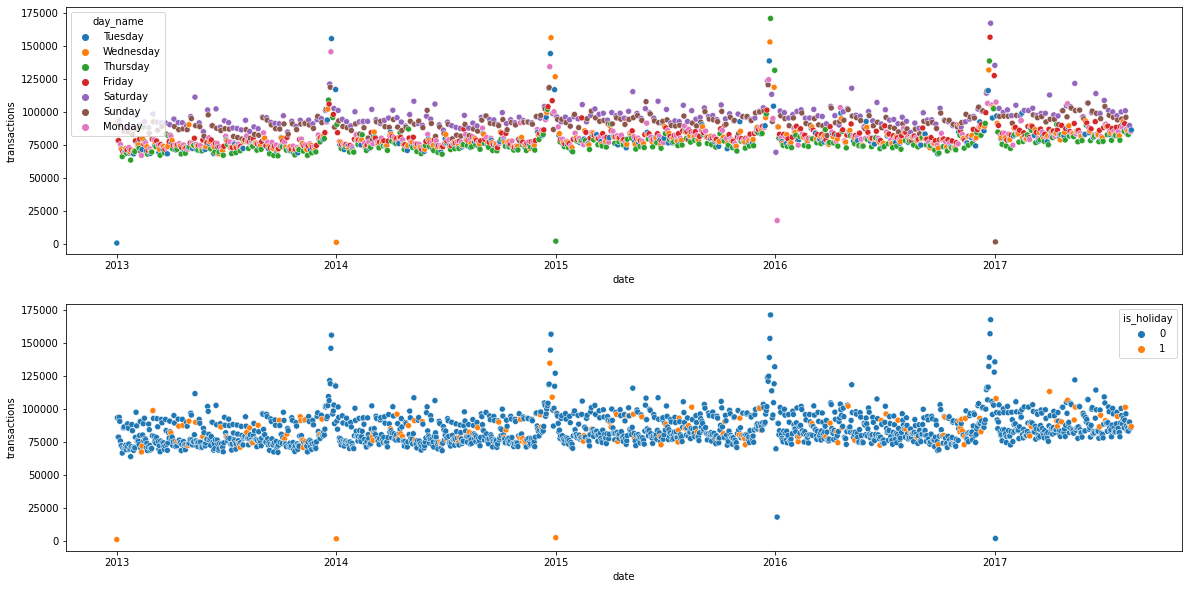

In [93]:
fig, axes = plt.subplots(2,1, figsize=(20,10))
sns.scatterplot(data=transactionss, x='date', y='transactions', hue = 'day_name', ax=axes[0])
sns.scatterplot(data=transactionss, x='date', y='transactions', hue = 'is_holiday', ax=axes[1])


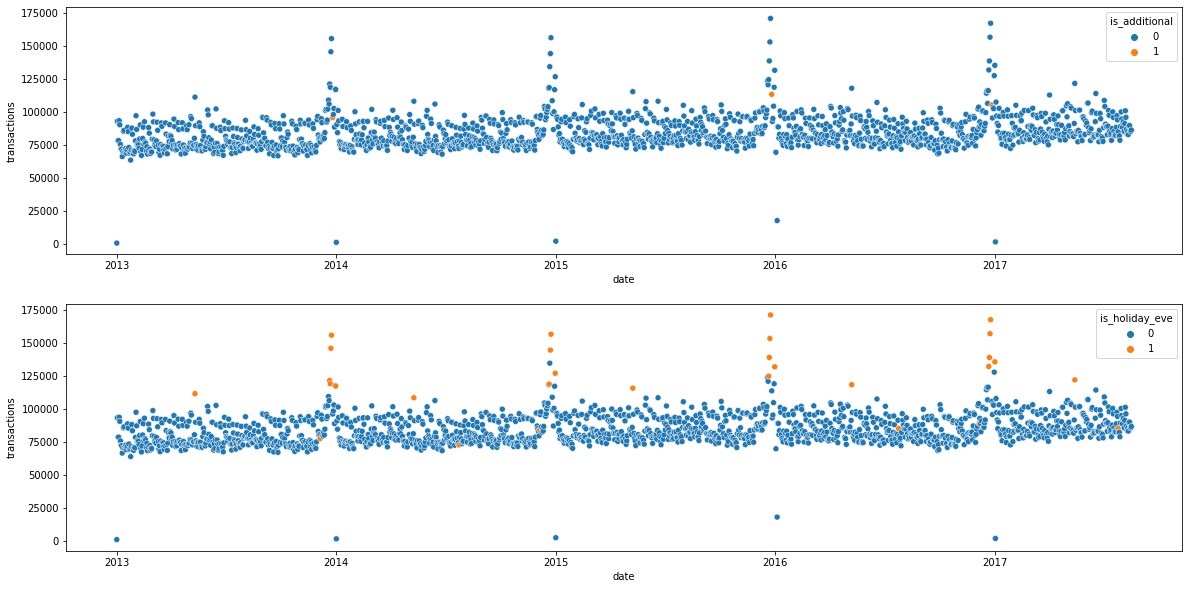

In [94]:
fig, axes = plt.subplots(2,1, figsize=(20,10))
sns.scatterplot(data=transactionss, x='date', y='transactions', hue = 'is_additional', ax=axes[0])
sns.scatterplot(data=transactionss, x='date', y='transactions', hue = 'is_holiday_eve', ax=axes[1])



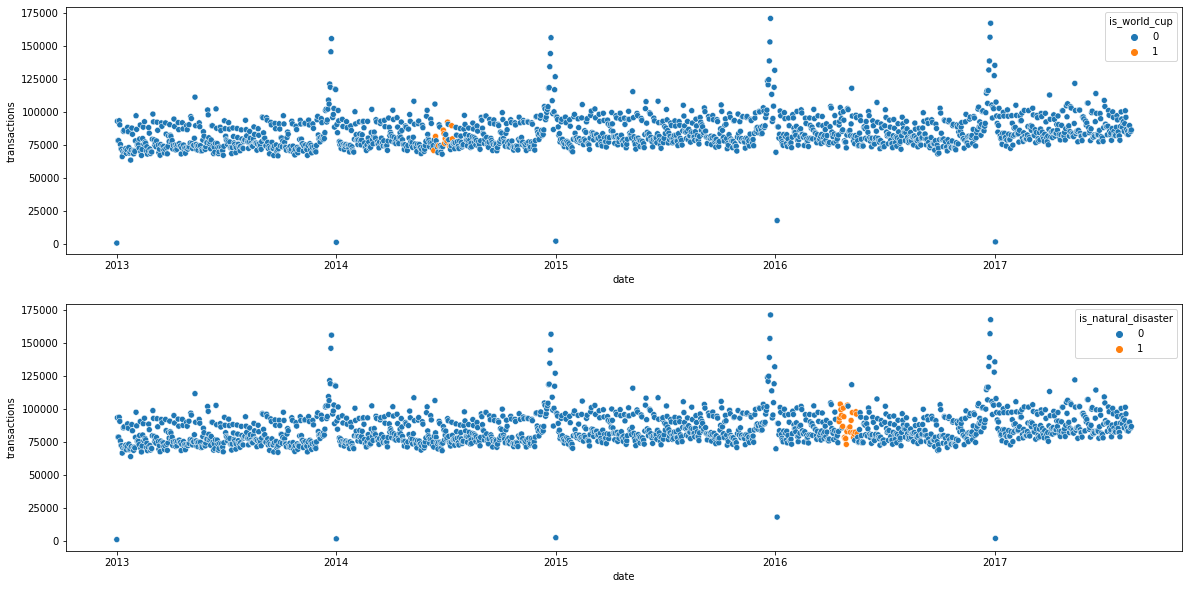

In [95]:
fig, axes = plt.subplots(2,1, figsize=(20,10))
sns.scatterplot(data=transactionss, x='date', y='transactions', hue = 'is_world_cup', ax=axes[0])
sns.scatterplot(data=transactionss, x='date', y='transactions', hue = 'is_natural_disaster', ax=axes[1])

teste cabosst

In [96]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from catboost import CatBoostRegressor

In [98]:
def time_series_train_test_split(df,test_size,predict_feature):
  test_split = int(int(df.shape[0])*test_size)
  df_train = df[test_split:]
  df_test = df[:test_split]
  X_train = df_train.drop(predict_feature, axis=1)
  X_test = df_test.drop(predict_feature, axis=1)
  y_train = df_train[predict_feature]
  y_test = df_test[predict_feature]
  return X_train, X_test , y_train, y_test

In [99]:
datatestmodel = transactionsdf[transactionsdf['store_nbr']==50]
selected_features = ['oil_price', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'is_additional', 'is_black_friday', 'is_cyber_monday', 'is_holiday',
       'is_holiday_eve', 'is_natural_disaster', 'is_world_cup', 'Madre',
       'Navidad','transactions']
features = datatestmodel[selected_features]
features.index = datatestmodel['date']
num_scaler = StandardScaler()
features_scaled = features
features_scaled['oil_price'] = num_scaler.fit_transform(features_scaled[['oil_price']])
X_train, X_test , y_train, y_test = time_series_train_test_split(features_scaled,0.2,'transactions')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [100]:
modeloboost= CatBoostRegressor(depth= 6 , iterations=1000,verbose=False)


In [101]:
modeloboost.fit(X_train, y_train)

In [102]:
y_pred_boost = modeloboost.predict(X_test)

In [103]:
mse = mean_squared_error(y_test, y_pred_boost)
rmse = np.sqrt(mse)
rmse

233.76754913927294

In [104]:
datatestmodel = transactionsdf[transactionsdf['store_nbr']==50]
selected_features = ['oil_price', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'is_additional', 'is_black_friday', 'is_cyber_monday', 'is_holiday',
       'is_holiday_eve', 'is_natural_disaster', 'is_world_cup', 'Madre',
       'Navidad','transactions']
features = datatestmodel[selected_features]
features.index = datatestmodel['date']
num_scaler = StandardScaler()
features_scaled = features
features_scaled['oil_price'] = num_scaler.fit_transform(features_scaled[['oil_price']])
model = Sequential()
model.add(Dense(30, input_dim=len(selected_features)-1, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(
    loss='mean_squared_error', 
    optimizer='adam', 
    metrics=['accuracy'])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [105]:
X_train, X_test , y_train, y_test = time_series_train_test_split(features_scaled,0.2,'transactions')

In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1342 entries, 2013-12-03 to 2017-08-15
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   oil_price            1342 non-null   float64
 1   Friday               1342 non-null   float64
 2   Monday               1342 non-null   float64
 3   Saturday             1342 non-null   float64
 4   Sunday               1342 non-null   float64
 5   Thursday             1342 non-null   float64
 6   Tuesday              1342 non-null   float64
 7   Wednesday            1342 non-null   float64
 8   is_additional        1342 non-null   float64
 9   is_black_friday      1342 non-null   float64
 10  is_cyber_monday      1342 non-null   float64
 11  is_holiday           1342 non-null   float64
 12  is_holiday_eve       1342 non-null   float64
 13  is_natural_disaster  1342 non-null   float64
 14  is_world_cup         1342 non-null   float64
 15  Madre               

In [107]:
selected_features_test = ['oil_price', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'is_additional', 'is_black_friday', 'is_cyber_monday', 'is_holiday',
       'is_holiday_eve', 'is_natural_disaster', 'is_world_cup', 'Madre',
       'Navidad']
reducetrain = traindf[selected_features_test]
reducetrain['oil_price'] = num_scaler.fit_transform(reducetrain[['oil_price']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [108]:
reducetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634358 entries, 0 to 1634357
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   oil_price            1634358 non-null  float64
 1   Friday               1634358 non-null  float64
 2   Monday               1634358 non-null  float64
 3   Saturday             1634358 non-null  float64
 4   Sunday               1634358 non-null  float64
 5   Thursday             1634358 non-null  float64
 6   Tuesday              1634358 non-null  float64
 7   Wednesday            1634358 non-null  float64
 8   is_additional        1634358 non-null  float64
 9   is_black_friday      1634358 non-null  float64
 10  is_cyber_monday      1634358 non-null  float64
 11  is_holiday           1634358 non-null  float64
 12  is_holiday_eve       1634358 non-null  float64
 13  is_natural_disaster  1634358 non-null  float64
 14  is_world_cup         1634358 non-null  float64
 15

In [109]:
model.fit(X_train, y_train, epochs = 500, batch_size = 100)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse


Epoch 1/500
14/14 [==============================] - 1s 2ms/step - loss: 7127965.5000 - accuracy: 0.0000e+00
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 7126491.5000 - accuracy: 0.0000e+00
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 7125286.5000 - accuracy: 0.0000e+00
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 7123766.5000 - accuracy: 0.0000e+00
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 7121450.5000 - accuracy: 0.0000e+00
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 7117595.0000 - accuracy: 0.0000e+00
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 7110845.0000 - accuracy: 0.0000e+00
Epoch 8/500
14/14 [==============================] - 0s 7ms/step - loss: 7099505.0000 - accuracy: 0.0000e+00
Epoch 9/500
14/14 [==============================] - 0s 5ms/step - loss: 7081079.0000 - accuracy: 0.0000e+00
Epoch 10/500
14/14 

234.34576927805347

In [110]:
traindf['aux'] = traindf['date'].astype(str) + traindf['store_nbr'].astype(str)

In [111]:
transactionsdfdict = dict (zip(transactionsdf['date'].astype(str) + transactionsdf['store_nbr'].astype(str), transactionsdf['transactions']))

In [112]:
def safedict(x, dictof):
  try:
    return dictof[x] 
  except:
    return np.nan
traindf['transactions'] = traindf.apply(lambda x: safedict(x['aux'], transactionsdfdict),axis=1)

In [113]:
train_missing = traindf[traindf['transactions'].isnull()]
selected_features_test = ['oil_price', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'is_additional', 'is_black_friday', 'is_cyber_monday', 'is_holiday',
       'is_holiday_eve', 'is_natural_disaster', 'is_world_cup', 'Madre',
       'Navidad']
train_missing_filled = train_missing[selected_features_test]
train_missing_filled['oil_price'] = num_scaler.fit_transform(train_missing_filled[['oil_price']])
train_missing['pred_train'] = model.predict(train_missing_filled)



72/72 [==============================] - 0s 1ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [114]:
filling_missingdict = dict (zip(train_missing['id'], train_missing['pred_train']))
def safedict(x, y, dictof, dicterror):
  try:
    return dictof[x] 
  except:
    return dicterror[y]
traindf['transactions'] = traindf.apply(lambda x: safedict(x['aux'],x['id'], transactionsdfdict, filling_missingdict ),axis=1)

In [115]:
traindf.head(50)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,oil_price,perishable,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,is_additional,is_black_friday,is_cyber_monday,is_holiday,is_holiday_eve,is_natural_disaster,is_world_cup,Madre,Navidad,BEVERAGES,BREAD/BAKERY,CLEANING,GROCERY I,PERSONAL CARE,1004,1010,1012,1014,1040,1058,1072,1084,1120,1124,2702,3032,3038,4114,aux,transactions
0,82,2013-01-01,25,258396,5,0,67.714366,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-0125,770.0
1,84,2013-01-01,25,261052,1,0,67.714366,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-0125,770.0
2,92,2013-01-01,25,265559,2,0,67.714366,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-0125,770.0
3,98,2013-01-01,25,273528,2,0,67.714366,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2013-01-0125,770.0
4,116,2013-01-01,25,314384,8,0,67.714366,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-0125,770.0
5,151,2013-01-01,25,364606,5,0,67.714366,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-0125,770.0
6,174,2013-01-01,25,414353,4,0,67.714366,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-0125,770.0
7,179,2013-01-01,25,414750,1,0,67.714366,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-0125,770.0
8,215,2013-01-01,25,502331,30,0,67.714366,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2013-01-0125,770.0
9,244,2013-01-01,25,559870,16,0,67.714366,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-01-0125,770.0


In [118]:
traindf_tran = traindf.copy()

In [119]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634358 entries, 0 to 1634357
Data columns (total 45 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   id                   1634358 non-null  int64         
 1   date                 1634358 non-null  datetime64[ns]
 2   store_nbr            1634358 non-null  int64         
 3   item_nbr             1634358 non-null  int64         
 4   unit_sales           1634358 non-null  int64         
 5   onpromotion          1634358 non-null  int64         
 6   oil_price            1634358 non-null  float64       
 7   perishable           1634358 non-null  int64         
 8   Friday               1634358 non-null  float64       
 9   Monday               1634358 non-null  float64       
 10  Saturday             1634358 non-null  float64       
 11  Sunday               1634358 non-null  float64       
 12  Thursday             1634358 non-null  float64       
 1

In [58]:
list_stores = testdf.store_nbr.unique()
list_stores = list(list_stores)
selected_features = ['oil_price', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'is_additional', 'is_black_friday', 'is_cyber_monday', 'is_holiday',
       'is_holiday_eve', 'is_natural_disaster', 'is_world_cup', 'Madre',
       'Navidad','transactions']
selected_features_test = ['oil_price', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'is_additional', 'is_black_friday', 'is_cyber_monday', 'is_holiday',
       'is_holiday_eve', 'is_natural_disaster', 'is_world_cup', 'Madre',
       'Navidad']       
model = Sequential()
model.add(Dense(30, input_dim=len(selected_features)-1, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(
    loss='mean_squared_error', 
    optimizer='adam', 
    metrics=['accuracy'])


dict_transactions = {}

for i in list_stores:
  
  single_store_data = transactionsdf[transactionsdf['store_nbr']==i]
  single_store_test = testdf[testdf['store_nbr']==i]
  features = single_store_data[selected_features]
  features.index = single_store_data['date']
  num_scaler = StandardScaler()
  features_scaled = features
  features_scaled['oil_price'] = num_scaler.fit_transform(features_scaled[['oil_price']])
  X_train, X_test , y_train, y_test = time_series_train_test_split(features_scaled,0.2,'transactions')
  model.fit(X_train, y_train, epochs = 500, batch_size = 100)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  print('RMSE para a loja: ', i, ' = ', rmse)
  X_test_f = single_store_test[selected_features_test]
  single_store_test['pred'] = model.predict(X_test_f)
  dictof = dict (zip(single_store_test['id'], single_store_test['pred']))
  dict_transactions = {**dict_transactions , **dictof}



Epoch 1/500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


14/14 [==============================] - 1s 2ms/step - loss: 2592221.7500 - accuracy: 0.0000e+00
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 2591577.2500 - accuracy: 0.0000e+00
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 2590505.2500 - accuracy: 0.0000e+00
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 2588790.2500 - accuracy: 0.0000e+00
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 2586026.5000 - accuracy: 0.0000e+00
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 2581517.2500 - accuracy: 0.0000e+00
Epoch 7/500
14/14 [==============================] - 0s 2ms/step - loss: 2573867.2500 - accuracy: 0.0000e+00
Epoch 8/500
14/14 [==============================] - 0s 2ms/step - loss: 2561260.5000 - accuracy: 0.0000e+00
Epoch 9/500
14/14 [==============================] - 0s 2ms/step - loss: 2541741.2500 - accuracy: 0.0000e+00
Epoch 10/500
14/14 [===========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


14/14 [==============================] - 0s 3ms/step - loss: 215644.2344 - accuracy: 0.0000e+00
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 166324.9062 - accuracy: 0.0000e+00
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 132073.5781 - accuracy: 0.0000e+00
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 107690.6250 - accuracy: 0.0000e+00
Epoch 7/500
14/14 [==============================] - 0s 2ms/step - loss: 89022.2656 - accuracy: 0.0000e+00
Epoch 8/500
14/14 [==============================] - 0s 3ms/step - loss: 75318.1562 - accuracy: 0.0000e+00
Epoch 9/500
14/14 [==============================] - 0s 2ms/step - loss: 64827.9297 - accuracy: 0.0000e+00
Epoch 10/500
14/14 [==============================] - 0s 3ms/step - loss: 56444.0000 - accuracy: 0.0000e+00
Epoch 11/500
14/14 [==============================] - 0s 2ms/step - loss: 50073.1016 - accuracy: 0.0000e+00
Epoch 12/500
14/14 [=======================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


14/14 [==============================] - 0s 3ms/step - loss: 134963.5000 - accuracy: 0.0000e+00
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 85098.8516 - accuracy: 0.0000e+00
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 78329.7656 - accuracy: 0.0000e+00
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 73323.7500 - accuracy: 0.0000e+00
Epoch 7/500
14/14 [==============================] - 0s 2ms/step - loss: 71372.2656 - accuracy: 0.0000e+00
Epoch 8/500
14/14 [==============================] - 0s 3ms/step - loss: 70475.0625 - accuracy: 0.0000e+00
Epoch 9/500
14/14 [==============================] - 0s 2ms/step - loss: 69977.6250 - accuracy: 0.0000e+00
Epoch 10/500
14/14 [==============================] - 0s 2ms/step - loss: 69646.5156 - accuracy: 0.0000e+00
Epoch 11/500
14/14 [==============================] - 0s 3ms/step - loss: 69466.7656 - accuracy: 0.0000e+00
Epoch 12/500
14/14 [==========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


14/14 [==============================] - 0s 3ms/step - loss: 51672.0781 - accuracy: 0.0000e+00
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 42230.9922 - accuracy: 0.0000e+00
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 34561.2539 - accuracy: 0.0000e+00
Epoch 6/500
14/14 [==============================] - 0s 4ms/step - loss: 28685.7773 - accuracy: 0.0000e+00
Epoch 7/500
14/14 [==============================] - 0s 3ms/step - loss: 26042.0371 - accuracy: 0.0000e+00
Epoch 8/500
14/14 [==============================] - 0s 3ms/step - loss: 24664.8750 - accuracy: 0.0000e+00
Epoch 9/500
14/14 [==============================] - 0s 3ms/step - loss: 23786.6348 - accuracy: 0.0000e+00
Epoch 10/500
14/14 [==============================] - 0s 3ms/step - loss: 23101.0703 - accuracy: 0.0000e+00
Epoch 11/500
14/14 [==============================] - 0s 3ms/step - loss: 22606.7188 - accuracy: 0.0000e+00
Epoch 12/500
14/14 [===========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


14/14 [==============================] - 0s 3ms/step - loss: 30554.5488 - accuracy: 0.0000e+00
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 28371.0527 - accuracy: 0.0000e+00
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 27335.8965 - accuracy: 0.0000e+00
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 26948.8711 - accuracy: 0.0000e+00
Epoch 7/500
14/14 [==============================] - 0s 4ms/step - loss: 26862.0234 - accuracy: 0.0000e+00
Epoch 8/500
14/14 [==============================] - 0s 3ms/step - loss: 26504.8887 - accuracy: 0.0000e+00
Epoch 9/500
14/14 [==============================] - 0s 2ms/step - loss: 26474.6523 - accuracy: 0.0000e+00
Epoch 10/500
14/14 [==============================] - 0s 3ms/step - loss: 26469.9277 - accuracy: 0.0000e+00
Epoch 11/500
14/14 [==============================] - 0s 3ms/step - loss: 26405.4043 - accuracy: 0.0000e+00
Epoch 12/500
14/14 [===========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


14/14 [==============================] - 0s 5ms/step - loss: 62551.1484 - accuracy: 0.0000e+00
Epoch 3/500
14/14 [==============================] - 0s 4ms/step - loss: 38194.8828 - accuracy: 0.0000e+00
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 30702.5840 - accuracy: 0.0000e+00
Epoch 5/500
14/14 [==============================] - 0s 4ms/step - loss: 28242.4277 - accuracy: 0.0000e+00
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 26734.0918 - accuracy: 0.0000e+00
Epoch 7/500
14/14 [==============================] - 0s 3ms/step - loss: 26196.8711 - accuracy: 0.0000e+00
Epoch 8/500
14/14 [==============================] - 0s 3ms/step - loss: 25741.2715 - accuracy: 0.0000e+00
Epoch 9/500
14/14 [==============================] - 0s 4ms/step - loss: 25380.5273 - accuracy: 0.0000e+00
Epoch 10/500
14/14 [==============================] - 0s 3ms/step - loss: 25206.7285 - accuracy: 0.0000e+00
Epoch 11/500
14/14 [============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


14/14 [==============================] - 0s 4ms/step - loss: 59177.0703 - accuracy: 0.0000e+00
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 38773.3047 - accuracy: 0.0000e+00
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 28478.0742 - accuracy: 0.0000e+00
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 23790.4023 - accuracy: 0.0000e+00
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 21167.3633 - accuracy: 0.0000e+00
Epoch 7/500
14/14 [==============================] - 0s 3ms/step - loss: 19667.9902 - accuracy: 0.0000e+00
Epoch 8/500
14/14 [==============================] - 0s 2ms/step - loss: 18674.4395 - accuracy: 0.0000e+00
Epoch 9/500
14/14 [==============================] - 0s 3ms/step - loss: 18009.4805 - accuracy: 0.0000e+00
Epoch 10/500
14/14 [==============================] - 0s 3ms/step - loss: 17624.8438 - accuracy: 0.0000e+00
Epoch 11/500
14/14 [============================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


14/14 [==============================] - 0s 3ms/step - loss: 73085.6953 - accuracy: 0.0000e+00
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 60712.2695 - accuracy: 0.0000e+00
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 55306.5352 - accuracy: 0.0000e+00
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 53848.4102 - accuracy: 0.0000e+00
Epoch 7/500
14/14 [==============================] - 0s 4ms/step - loss: 52851.6992 - accuracy: 0.0000e+00
Epoch 8/500
14/14 [==============================] - 0s 3ms/step - loss: 52274.0625 - accuracy: 0.0000e+00
Epoch 9/500
14/14 [==============================] - 0s 3ms/step - loss: 51964.6719 - accuracy: 0.0000e+00
Epoch 10/500
14/14 [==============================] - 0s 3ms/step - loss: 51662.3711 - accuracy: 0.0000e+00
Epoch 11/500
14/14 [==============================] - 0s 3ms/step - loss: 51423.9062 - accuracy: 0.0000e+00
Epoch 12/500
14/14 [===========================

KeyboardInterrupt: ignored

In [ ]:
testdf['transactions'] = testdf['id'].map(lambda x: dict_transactions[x])

In [ ]:

testdf.info()

In [ ]:
traindf.info()

In [120]:
traindf.drop('aux', inplace=True,axis=1)
testdf.drop('predss', inplace=True,axis=1)
testdf.to_csv('testdf_trans.csv', index=False)
traindf.to_csv('traindf_trans_new.csv', index=False)